<a href="https://colab.research.google.com/github/aayeshaqureshi/100daysofdsa/blob/main/pytrorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

what_were_covering = {1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"
}

In [1]:
import torch 
from torch import nn
import matplotlib.pyplot as plt
# check the version
torch.__version__

'1.13.1+cu116'

# Data preparing and Loading


In [2]:
weight = 0.7
bias = 0.3
#create data
start=0
end=1
step=0.02
X= torch.arange(start, end, step).unsqueeze(dim=1)
y=weight*X+ bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [3]:
#Splitting data into training and testing sets
train_split= int(0.8*len(X))
X_train, y_train=X[:train_split], y[:train_split]
X_test, y_test= X[train_split:], y[train_split:]


len(X_train),len(y_train), len(X_test), len(y_test)




(40, 40, 10, 10)

In [4]:
#visulazing the data we have created 
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  plt.figure(figsize=(10,7))
  #plot trainign data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label= "Training data")
  #plot testing data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
  if predictions is not None:
    #plot the predictions in red-testing data
    plt.scatter(test_data, predictions, c="r", s=4, label="predictions")
  plt.legend(prop={"size":14});

    

  


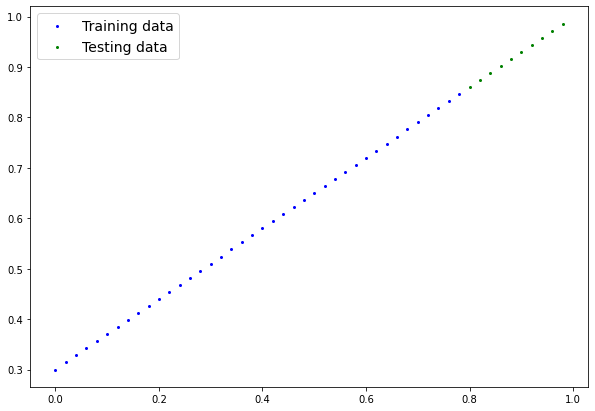

In [5]:
plot_predictions();


In [6]:
# buiilding a model to predict the green dots using the blue dots 
#create a Linear regression model
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights=nn.Parameter(torch.randn(1, dtype= torch.float),requires_grad= True)
    self.bias= nn.Parameter(torch.randn(1, dtype=torch.float),requires_grad= True)
  def forward(self, x:torch.Tensor)->torch.Tensor:
    return self.weights*x+ self.bias



In [7]:
#creating a model instance with the class we have made and check its parameters 
torch.manual_seed(42)
model_0= LinearRegressionModel()

#check the nn parameters 
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [8]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [9]:
#makinf predictions using the inference model
with torch.inference_mode():
  y_preds= model_0(X_test)


In [10]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}") 
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


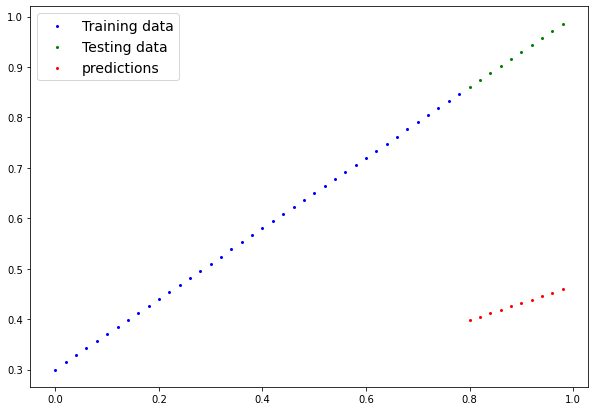

In [11]:
plot_predictions(predictions=y_preds)


In [12]:
y_test- y_preds 

tensor([[0.4618],
        [0.4691],
        [0.4764],
        [0.4836],
        [0.4909],
        [0.4982],
        [0.5054],
        [0.5127],
        [0.5200],
        [0.5272]])

In [13]:
#create a loss function and optimizer in pytorch 

loss_fn= nn.L1Loss()
# create the optimzer 
optimizer= torch.optim.SGD(params= model_0.parameters(), lr=0.01)


In [14]:
#create a training and testing loop
#training 
#forward pass--> calculate the loss--> zero gradients--> perform backpropagation on the loss--> update the optimizer 
#testing 
# forward pass--> calculate the loss--> calculate evaluation metrics(optional)


In [15]:
torch.manual_seed(42)
#set the number of epochs 
epochs=100
#creating empty loss lists to track values 
train_loss_values=[]
test_loss_values=[]
epoch_count=[]

for epoch in range(epochs):
  ###training 
  #put model in training mode 
  model_0.train()
  #forward pass on the training data 
  y_pred= model_0(X_train)
  print(y_pred)
  #2. caluclate the loss
  loss= loss_fn(y_pred, y_train)
  # 3. zero grad of the optimizer
  optimizer.zero_grad()
  #4. loss backwards
  loss.backward()
  #5. progress the optimizer 
  optimizer.step()


  ###testing 
  #put the model in evaluation mode
  model_0.eval()
  with torch.inference_mode():
    test_pred= model_0(X_test)
    #2. calculate the loss on test data
    test_loss= loss_fn(test_pred, y_test.type(torch.float))


    if epoch%10 ==0:
      epoch_count.append(epoch)
      train_loss_values.append(loss.detach().numpy())
      test_loss_values.append(test_loss.detach().numpy())
      print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

tensor([[0.1288],
        [0.1355],
        [0.1423],
        [0.1490],
        [0.1557],
        [0.1625],
        [0.1692],
        [0.1759],
        [0.1827],
        [0.1894],
        [0.1961],
        [0.2029],
        [0.2096],
        [0.2163],
        [0.2231],
        [0.2298],
        [0.2366],
        [0.2433],
        [0.2500],
        [0.2568],
        [0.2635],
        [0.2702],
        [0.2770],
        [0.2837],
        [0.2904],
        [0.2972],
        [0.3039],
        [0.3106],
        [0.3174],
        [0.3241],
        [0.3308],
        [0.3376],
        [0.3443],
        [0.3510],
        [0.3578],
        [0.3645],
        [0.3712],
        [0.3780],
        [0.3847],
        [0.3914]], grad_fn=<AddBackward0>)
Epoch: 0 | MAE Train Loss: 0.31288138031959534 | MAE Test Loss: 0.48106518387794495 
tensor([[0.1388],
        [0.1456],
        [0.1524],
        [0.1592],
        [0.1661],
        [0.1729],
        [0.1797],
        [0.1865],
        [0.1933],
        

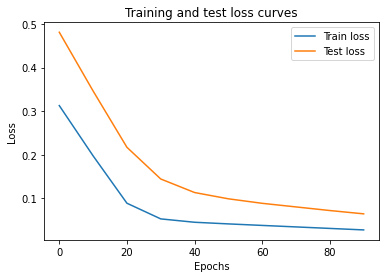

In [16]:
#plotting the loss curves
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [17]:
# using state_dict() to see how close our model gets to the orignal values for weights and biases
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


In [18]:
#MAKING PREDICTIONS WITH A TRAINED MODEL PYTROCH MODEL (INFERENCE)
#SETTING THE MODEL IN EVALUATION MODE
model_0.eval()
#setup the inference mode context manager
with torch.inference_mode():
  y_preds= model_0(X_test)
y_pred


tensor([[0.3518],
        [0.3633],
        [0.3749],
        [0.3864],
        [0.3979],
        [0.4095],
        [0.4210],
        [0.4325],
        [0.4441],
        [0.4556],
        [0.4671],
        [0.4787],
        [0.4902],
        [0.5017],
        [0.5133],
        [0.5248],
        [0.5363],
        [0.5479],
        [0.5594],
        [0.5709],
        [0.5825],
        [0.5940],
        [0.6055],
        [0.6171],
        [0.6286],
        [0.6401],
        [0.6517],
        [0.6632],
        [0.6747],
        [0.6863],
        [0.6978],
        [0.7093],
        [0.7209],
        [0.7324],
        [0.7439],
        [0.7555],
        [0.7670],
        [0.7785],
        [0.7901],
        [0.8016]], grad_fn=<AddBackward0>)

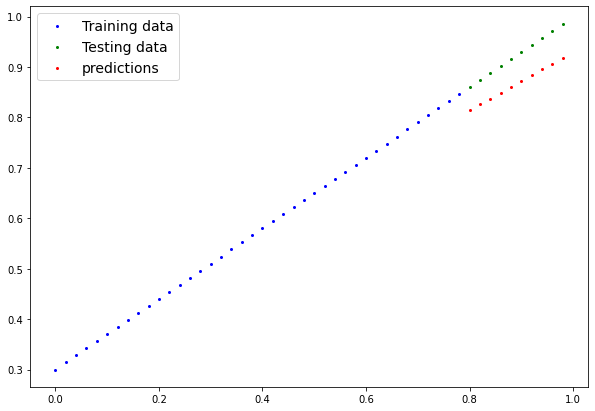

In [19]:
#HOW DO THESE PREDICTIONS LOOK LIKE?
plot_predictions(predictions= y_preds)
